In [1]:
from itertools import islice
import random as rnd
from src.estimate_watermark import *
from src.preprocess import *
from src.image_getter import *
from src.watermark_reconstruct import *

wm_type = 'ci'
source = 'cian'
dir_images = f'./dataset/{source}'
cropped_wm_dir = f'./dataset/{source}_' + str(''.join(rnd.choice('qwertyuiopasdfghjkl') for i in range(4)))  # + '/cropped'
files_number = 25
image_size = 1280

if not os.path.isdir(dir_images):
    os.mkdir(dir_images)

files = os.listdir(dir_images)

if len(files) == 0:
    photo_scrape(dir_images, files_number, wm_type)
else:
    print("All files downloaded")

# Thresholds -----------------------------------------------------------------------------------------------------------
wm_detector_low_thr = 100
wm_detector_high_thr = 220
wm_crop_trh = 0.2

J = read_images(dir_images)


All files downloaded


In [2]:
images = preprocess(J, image_size)

Wm_x, Wm_y, num_images = estimate_watermark(images)

Computing images gradients.
Computing median gradients.


In [8]:
W_mod = np.sqrt(np.square(Wm_x) + np.square(Wm_y))
W_mod = (W_mod - np.min(W_mod)) / (np.max(W_mod) - np.min(W_mod))
W_mod = threshold_image(W_mod, threshold=0.05)

cv2.imwrite(
        (os.sep.join([os.path.abspath('./dataset'), 'mask.jpg'])),
        W_mod
    )

True

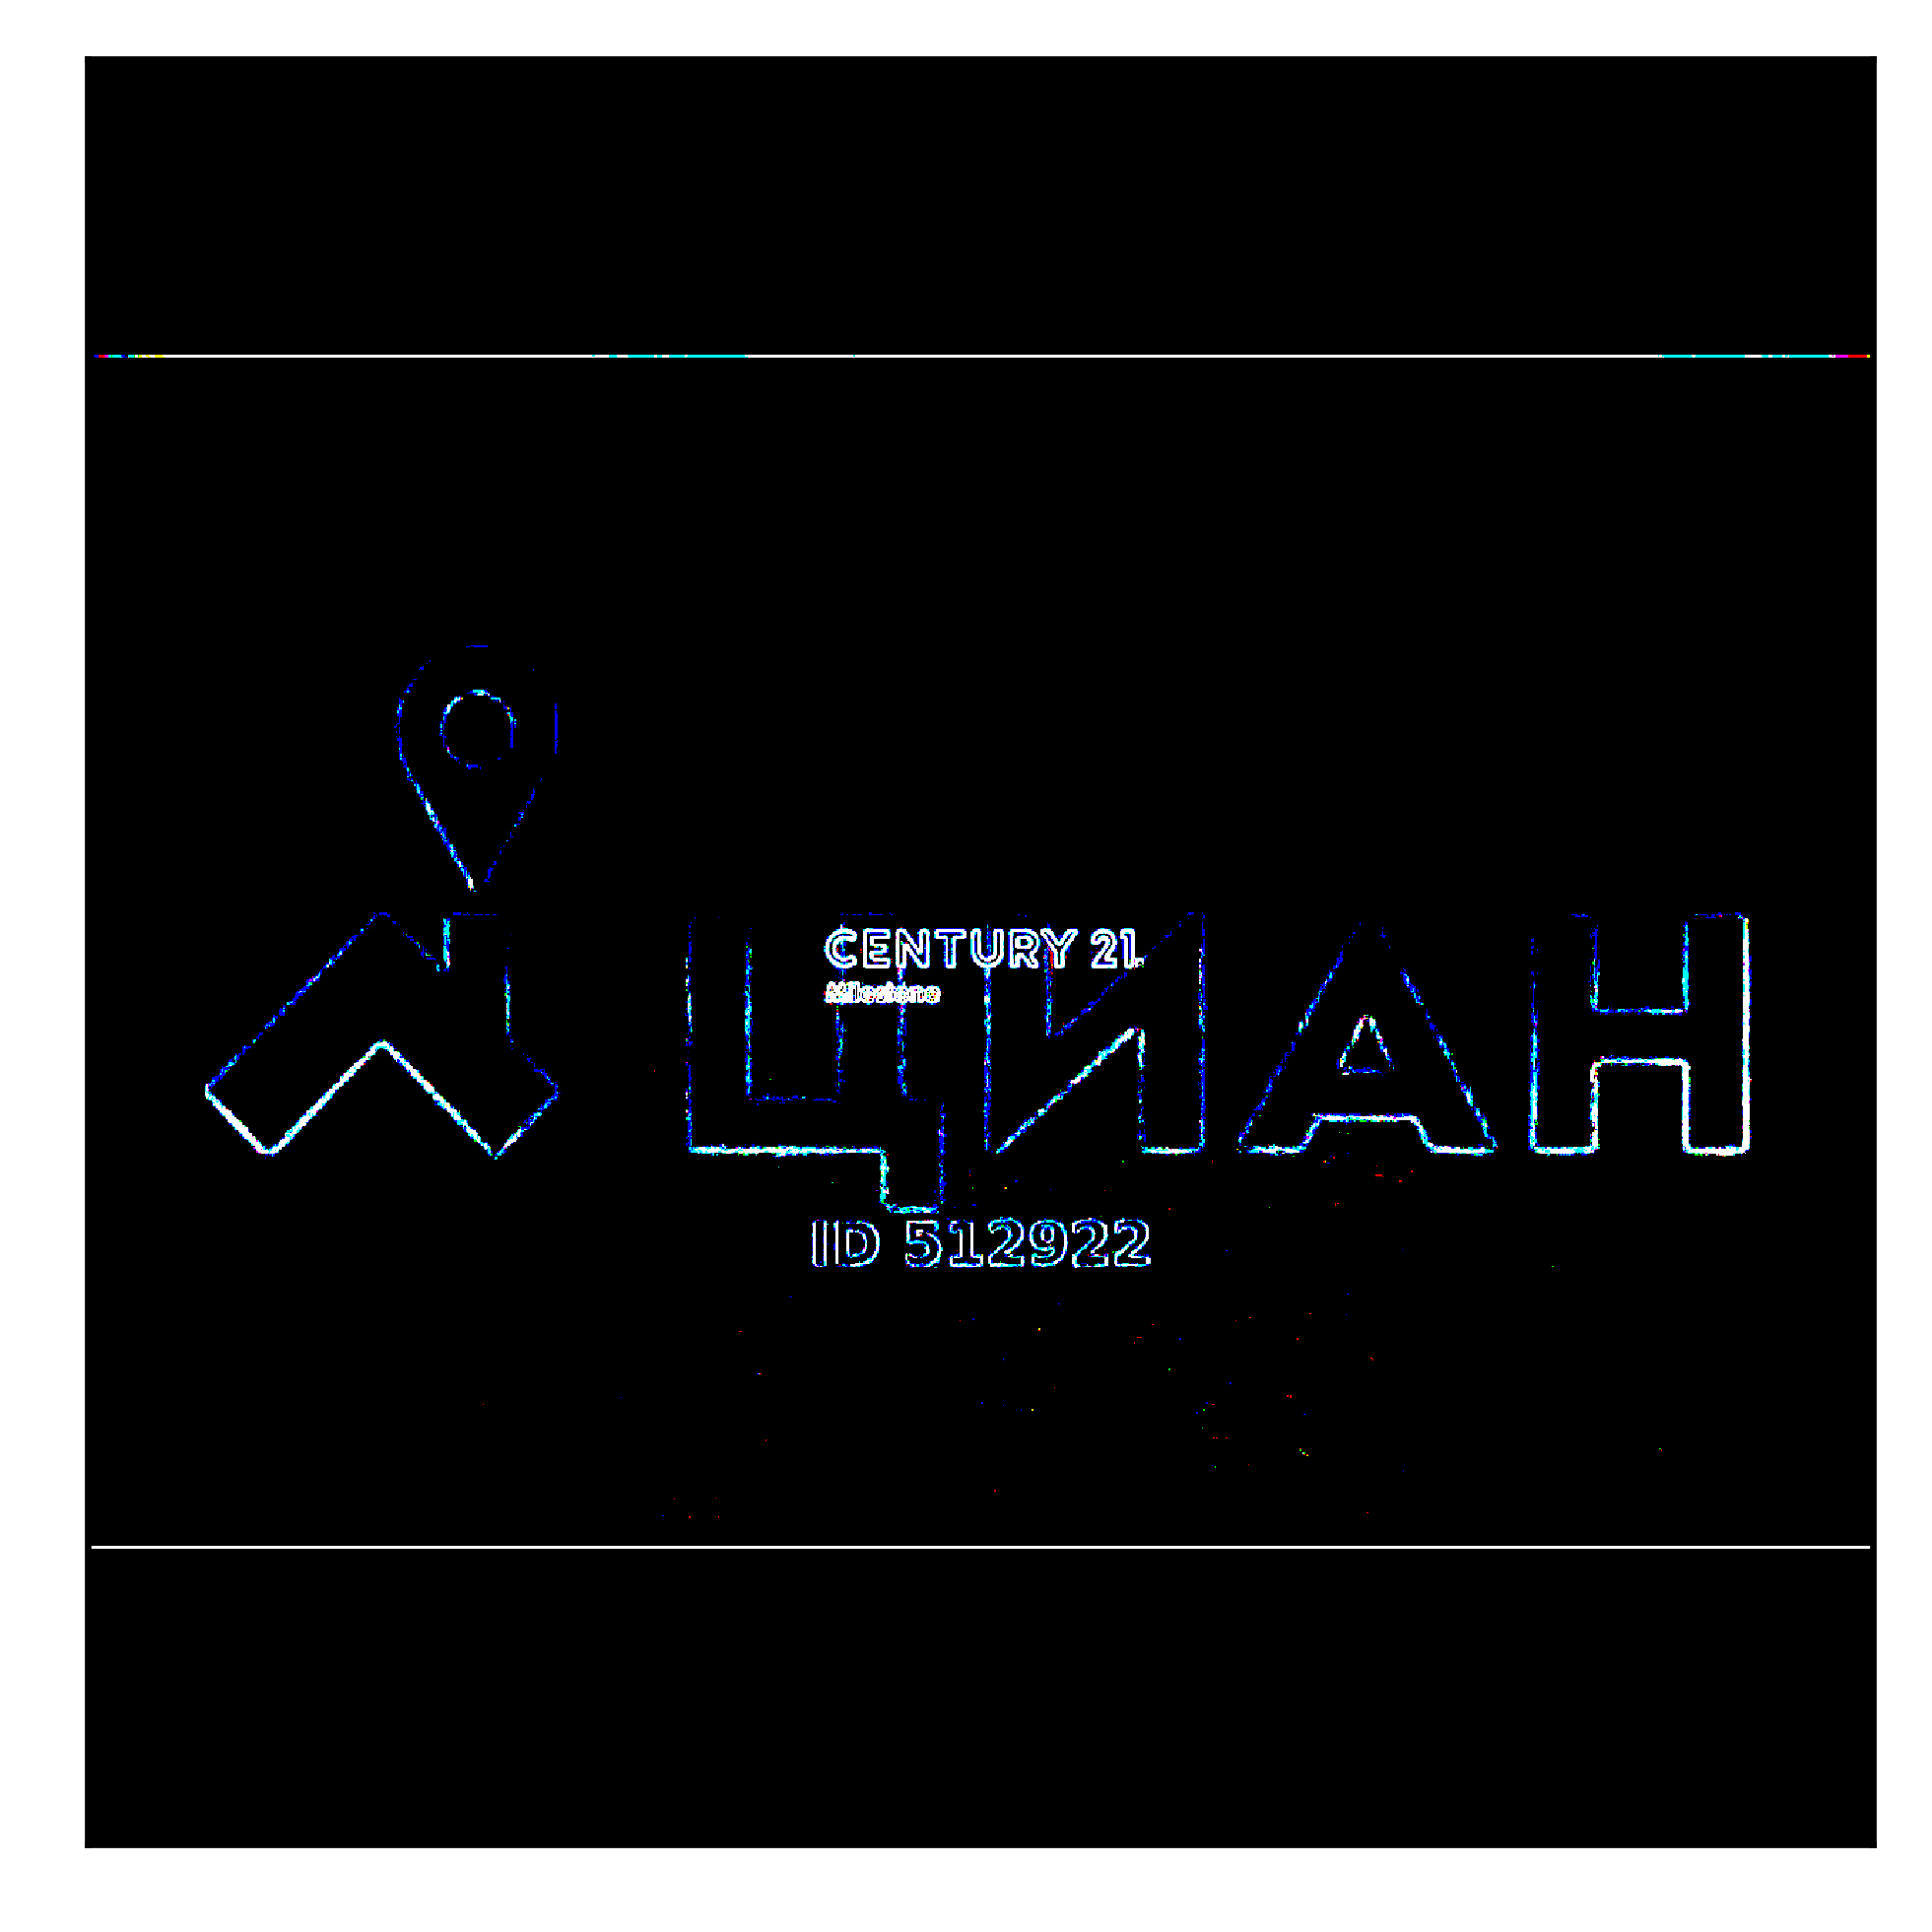

In [6]:
W_mod = threshold_image(W_mod, threshold=0.05)

plot_images([W_mod])


In [11]:
W_mod = cv2.imread(os.sep.join([os.path.abspath('./dataset'), 'mask.jpg']))

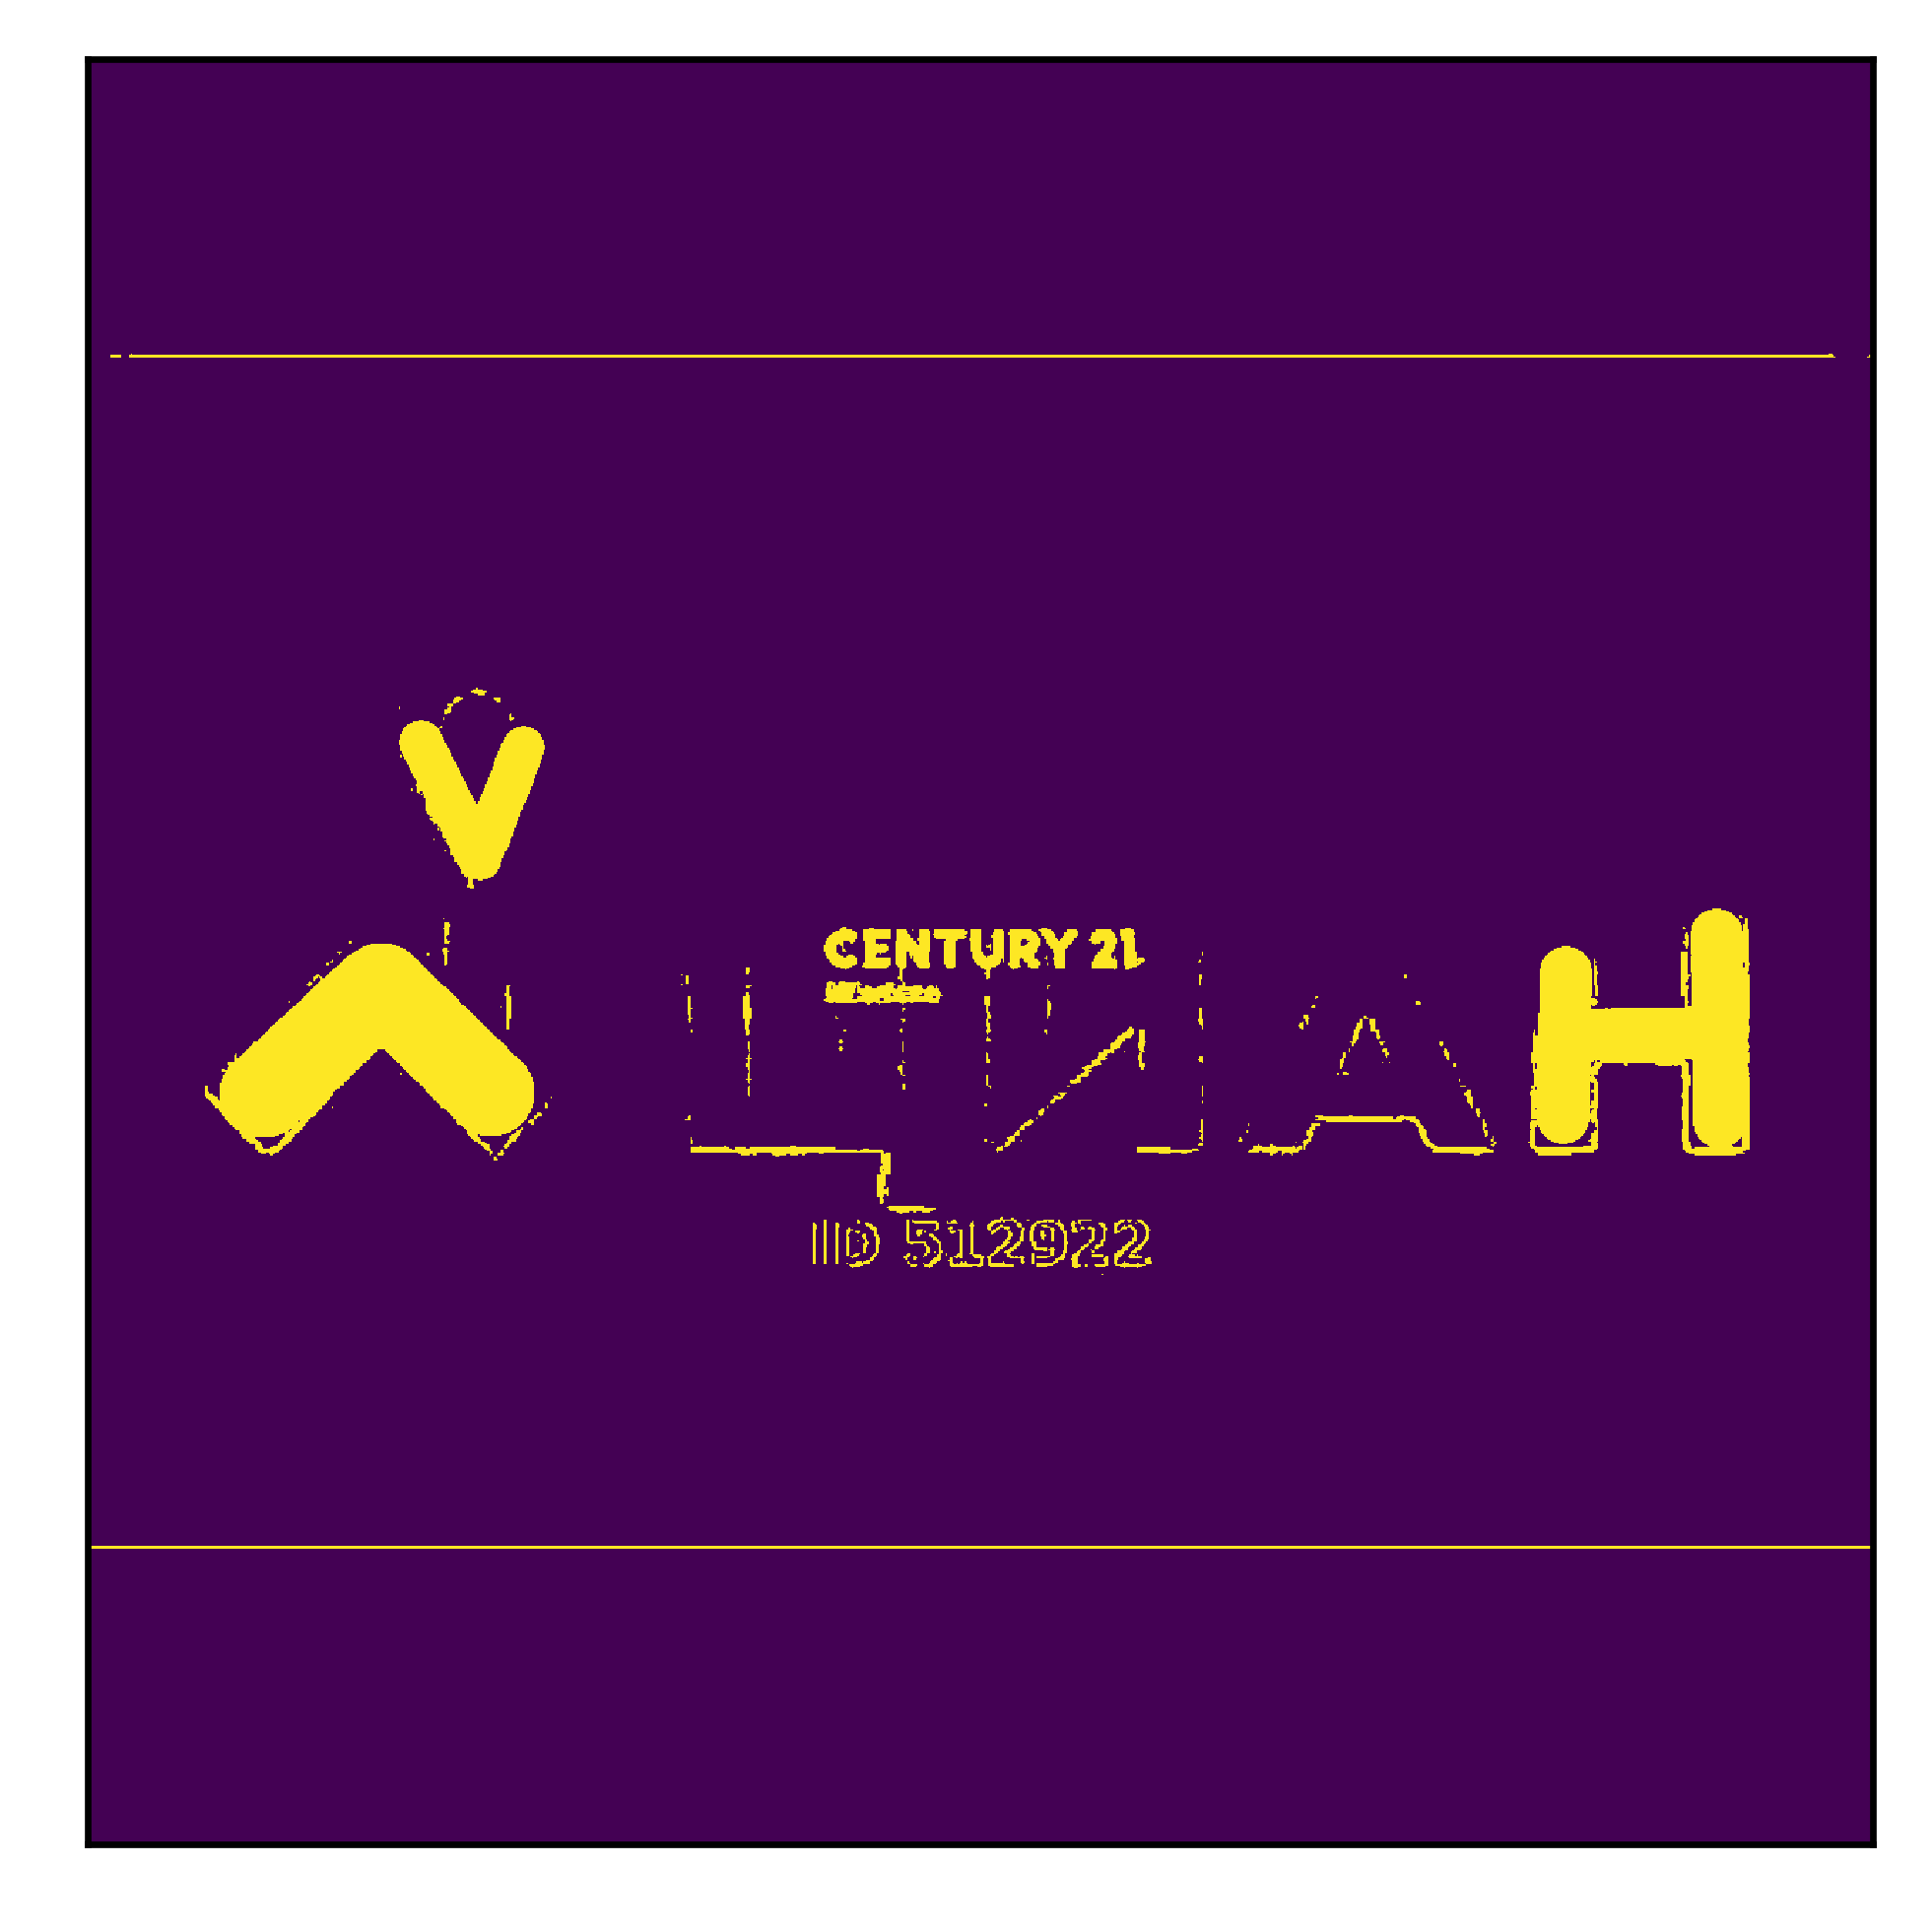

In [12]:
W_mod = np.average(W_mod, axis=2)
W_mod = threshold_image(W_mod, threshold=0.05)
W_mod = W_mod.astype('uint8')
plot_images([W_mod], False)

In [15]:

# W_mod = cv2.imread(os.sep.join([os.path.abspath('./dataset'), 'mask.png']))

inp_img = preprocess(J, image_size, 'constant')

if not os.path.isdir(cropped_wm_dir):
    os.makedirs(cropped_wm_dir)

for f, im in inp_img.items():
    dst = cv2.inpaint(im, W_mod, 3, cv2.INPAINT_TELEA)
    cv2.imwrite(
        (os.sep.join([os.path.abspath(cropped_wm_dir), 'inp_T_' + f])),
        dst
    )